STEP 1: Importing libraries...
 All libraries imported successfully!

 STEP 2: Creating SQLite database with sample sales data...
Database created successfully with sample sales data!

STEP 3: Connecting to database and viewing raw data...
Here's all the data in our sales table:
   id     product  quantity  price   sale_date
0   1      Laptop         5    800  2024-01-15
1   2       Mouse        25     20  2024-01-16
2   3    Keyboard        15     50  2024-01-17
3   4     Monitor         8    300  2024-01-18
4   5      Laptop         3    800  2024-01-19
5   6       Mouse        30     20  2024-01-20
6   7  Headphones        12     75  2024-01-21
7   8    Keyboard        10     50  2024-01-22
8   9     Monitor         6    300  2024-01-23
9  10  Headphones         8     75  2024-01-24

Total records: 10

STEP 4: Running first SQL query - Product Summary...
PRODUCT SALES SUMMARY:
      product  total_quantity  total_revenue  number_of_sales  average_price
0      Laptop               8 

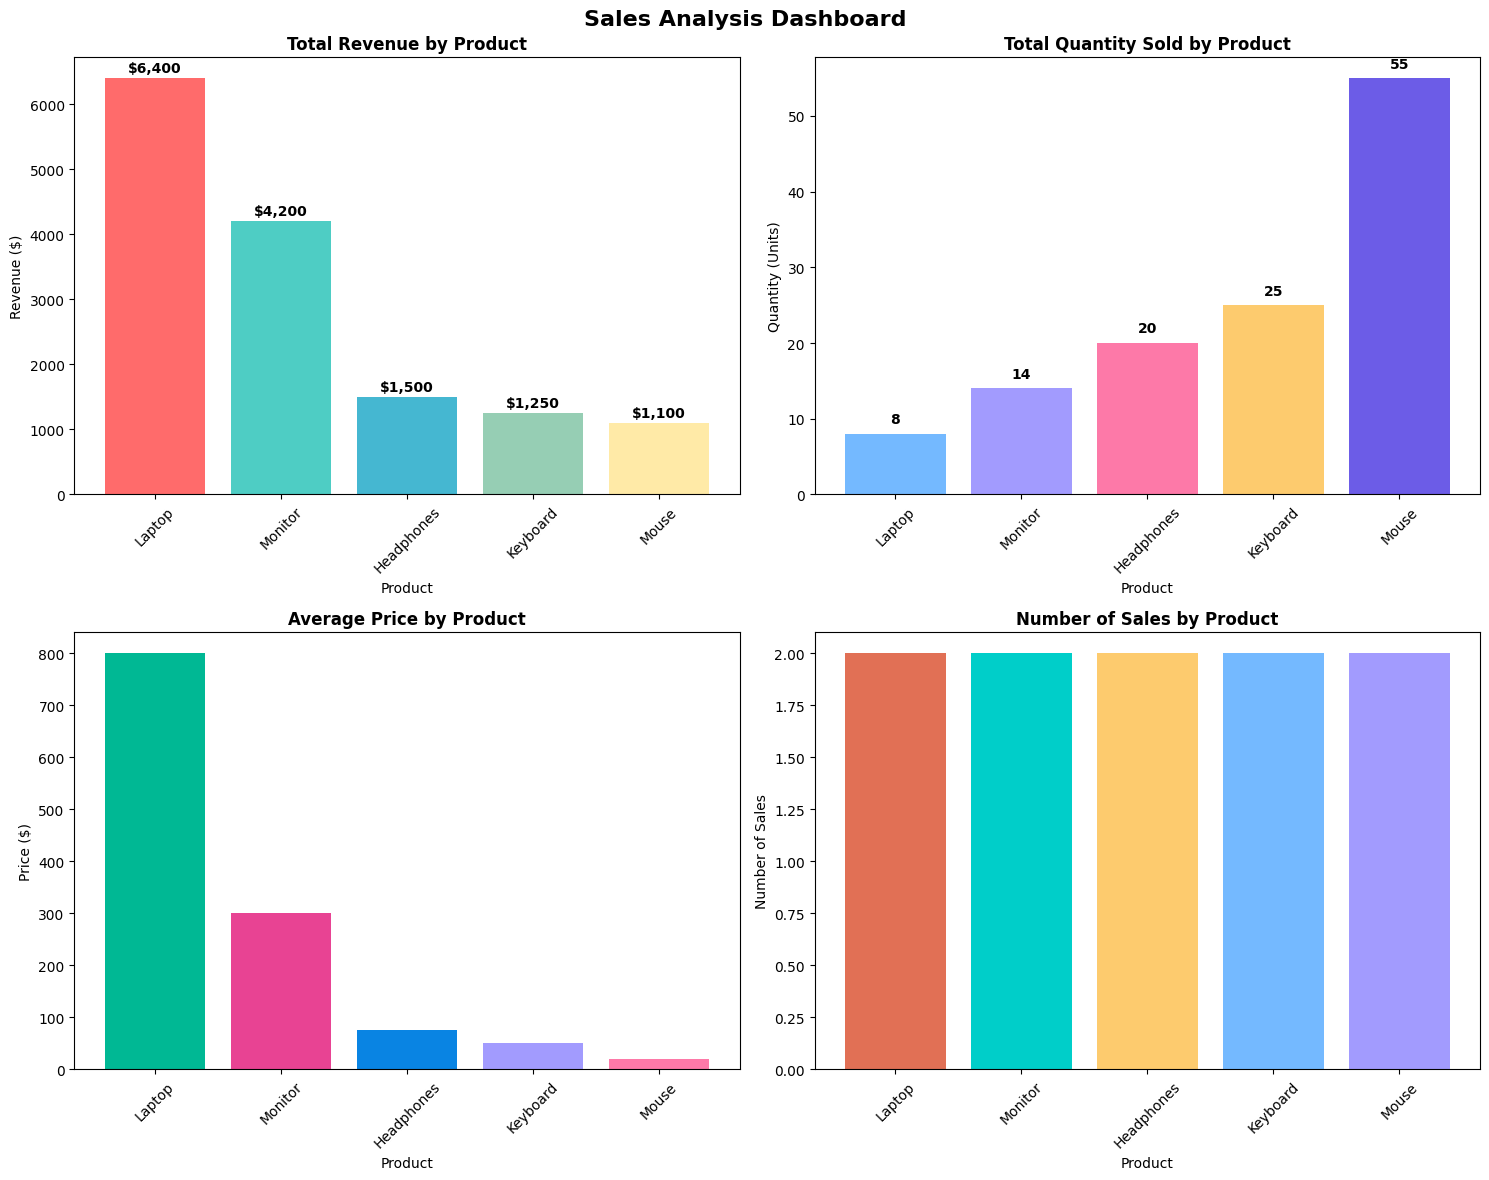

Charts created successfully!

STEP 7: Creating simple bar chart for revenue...


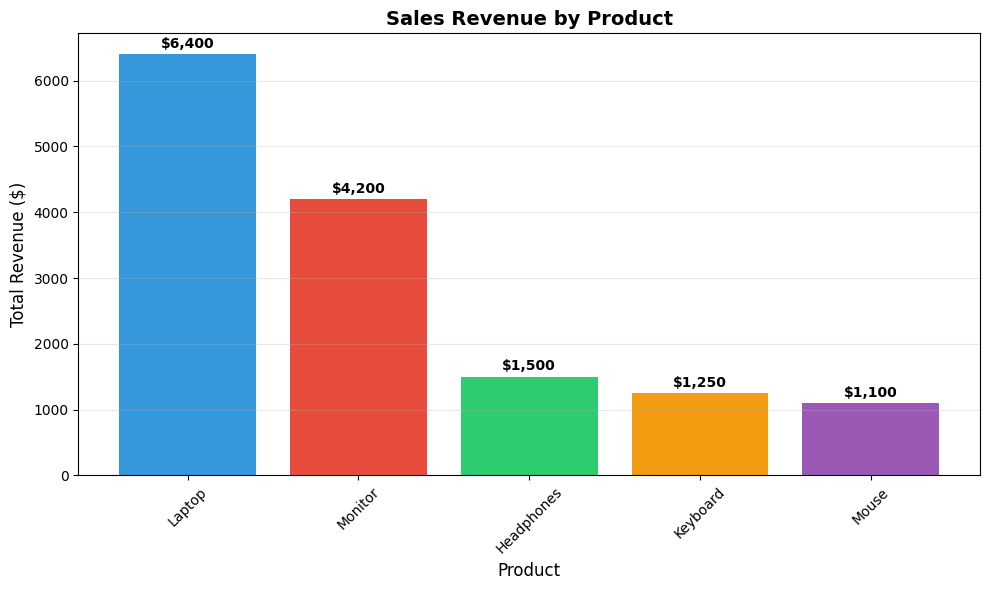

Simple bar chart created!

STEP 8: Saving results...
Chart saved as 'sales_revenue_chart.png'
Product summary saved as 'product_summary.csv'
STEP 9: Key Insights from Analysis...
Top Revenue Product: Laptop ($6,400.00)
Most Popular Product: Mouse (55 units)
Total Business Revenue: $14,450.00
Total Transactions: 10.0

WHAT WE LEARNED:
How to create and connect to SQLite database
How to write SQL queries in Python
How to use pandas to handle SQL results
How to create basic visualizations with matplotlib
How to analyze business data and extract insights

Task completed successfully! Database connection closed.
Check your files: sales_data.db, sales_revenue_chart.png, product_summary.csv


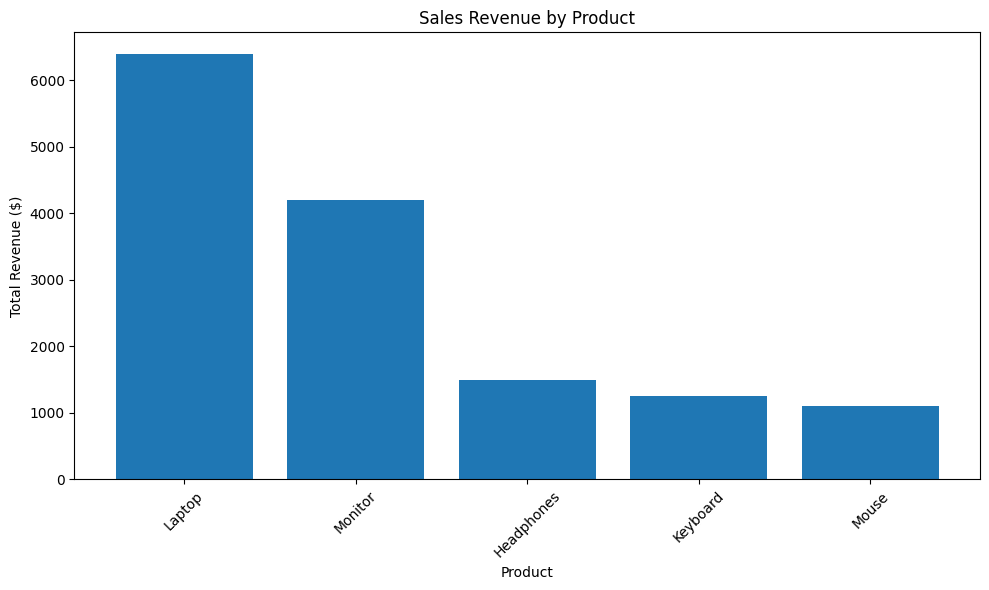

In [1]:
# TASK 7: Basic Sales Summary from SQLite Database using Python


# STEP 1: Import Required Libraries

print("STEP 1: Importing libraries...")

# Import all the libraries we need
import sqlite3          # For SQLite database operations
import pandas as pd     # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating charts
import numpy as np      # For numerical operations

print(" All libraries imported successfully!")
print()

# STEP 2: Create a Small SQLite Database with Sample Data

print(" STEP 2: Creating SQLite database with sample sales data...")

# Connecting to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Creating a sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price DECIMAL(10,2) NOT NULL,
    sale_date TEXT NOT NULL
)
''')

# Insert sample sales data
sample_data = [
    (1, 'Laptop', 5, 800.00, '2024-01-15'),
    (2, 'Mouse', 25, 20.00, '2024-01-16'),
    (3, 'Keyboard', 15, 50.00, '2024-01-17'),
    (4, 'Monitor', 8, 300.00, '2024-01-18'),
    (5, 'Laptop', 3, 800.00, '2024-01-19'),
    (6, 'Mouse', 30, 20.00, '2024-01-20'),
    (7, 'Headphones', 12, 75.00, '2024-01-21'),
    (8, 'Keyboard', 10, 50.00, '2024-01-22'),
    (9, 'Monitor', 6, 300.00, '2024-01-23'),
    (10, 'Headphones', 8, 75.00, '2024-01-24')
]

# Clear any existing data and insert fresh data
cursor.execute('DELETE FROM sales')
cursor.executemany('INSERT INTO sales VALUES (?, ?, ?, ?, ?)', sample_data)

# Save changes and close connection temporarily
conn.commit()
conn.close()

print("Database created successfully with sample sales data!")
print()

# ============================================================================
# STEP 3: Connect to Database and View Raw Data
# ============================================================================
print("STEP 3: Connecting to database and viewing raw data...")

# Reconnect to the database
conn = sqlite3.connect('sales_data.db')

# Query to see all data in our table
view_query = "SELECT * FROM sales"
all_data = pd.read_sql_query(view_query, conn)

print("Here's all the data in our sales table:")
print(all_data)
print()
print(f"Total records: {len(all_data)}")
print()

# ============================================================================
# STEP 4: First SQL Query - Product Summary
# ============================================================================
print("STEP 4: Running first SQL query - Product Summary...")

# SQL query to get total quantity and revenue by product
query1 = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue,
    COUNT(*) AS number_of_sales,
    AVG(price) AS average_price
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Execute query and load into pandas DataFrame
df_product_summary = pd.read_sql_query(query1, conn)

print("PRODUCT SALES SUMMARY:")
print("=" * 50)
print(df_product_summary)
print()

# Display results in a more readable format
print("FORMATTED SUMMARY:")
print("=" * 50)
for index, row in df_product_summary.iterrows():
    print(f"Product: {row['product']}")
    print(f"  • Total Quantity Sold: {row['total_quantity']} units")
    print(f"  • Total Revenue: ${row['total_revenue']:,.2f}")
    print(f"  • Number of Sales: {row['number_of_sales']}")
    print(f"  • Average Price: ${row['average_price']:,.2f}")
    print()

# ============================================================================
# STEP 5: Second SQL Query - Overall Business Summary
# ============================================================================
print("STEP 5: Running second SQL query - Overall Business Summary...")

query2 = """
SELECT
    COUNT(*) AS total_transactions,
    SUM(quantity) AS total_units_sold,
    SUM(quantity * price) AS total_revenue,
    AVG(quantity * price) AS average_transaction_value,
    MAX(quantity * price) AS highest_transaction,
    MIN(quantity * price) AS lowest_transaction
FROM sales
"""

df_business_summary = pd.read_sql_query(query2, conn)

print("OVERALL BUSINESS SUMMARY:")
print("=" * 50)
print(df_business_summary)
print()

# Display in readable format
summary = df_business_summary.iloc[0]  # Get the first (and only) row
print("BUSINESS METRICS:")
print("=" * 30)
print(f"Total Transactions: {summary['total_transactions']}")
print(f"Total Units Sold: {summary['total_units_sold']}")
print(f"Total Revenue: ${summary['total_revenue']:,.2f}")
print(f"Average Transaction: ${summary['average_transaction_value']:,.2f}")
print(f"Highest Transaction: ${summary['highest_transaction']:,.2f}")
print(f"Lowest Transaction: ${summary['lowest_transaction']:,.2f}")
print()

# ============================================================================
# STEP 6: Create Basic Bar Charts
# ============================================================================
print("STEP 6: Creating visualizations...")

# Set up the plotting style
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# Chart 1: Revenue by Product (Bar Chart)
ax1.bar(df_product_summary['product'], df_product_summary['total_revenue'],
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax1.set_title('Total Revenue by Product', fontweight='bold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(df_product_summary['total_revenue']):
    ax1.text(i, v + 50, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Chart 2: Quantity Sold by Product
ax2.bar(df_product_summary['product'], df_product_summary['total_quantity'],
        color=['#74B9FF', '#A29BFE', '#FD79A8', '#FDCB6E', '#6C5CE7'])
ax2.set_title('Total Quantity Sold by Product', fontweight='bold')
ax2.set_xlabel('Product')
ax2.set_ylabel('Quantity (Units)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(df_product_summary['total_quantity']):
    ax2.text(i, v + 1, f'{v}', ha='center', va='bottom', fontweight='bold')

# Chart 3: Average Price by Product
ax3.bar(df_product_summary['product'], df_product_summary['average_price'],
        color=['#00B894', '#E84393', '#0984E3', '#A29BFE', '#FD79A8'])
ax3.set_title('Average Price by Product', fontweight='bold')
ax3.set_xlabel('Product')
ax3.set_ylabel('Price ($)')
ax3.tick_params(axis='x', rotation=45)

# Chart 4: Number of Sales by Product
ax4.bar(df_product_summary['product'], df_product_summary['number_of_sales'],
        color=['#E17055', '#00CEC9', '#FDCB6E', '#74B9FF', '#A29BFE'])
ax4.set_title('Number of Sales by Product', fontweight='bold')
ax4.set_xlabel('Product')
ax4.set_ylabel('Number of Sales')
ax4.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

print("Charts created successfully!")
print()

# ============================================================================
# STEP 7: Create a Simple Single Bar Chart (As Required)
# ============================================================================
print("STEP 7: Creating simple bar chart for revenue...")

# Create a simple bar chart focusing on revenue (as mentioned in task)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_product_summary['product'], df_product_summary['total_revenue'],
               color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6'])

plt.title('Sales Revenue by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Simple bar chart created!")
print()

# ============================================================================
# STEP 8: Save Results and Charts
# ============================================================================
print("STEP 8: Saving results...")

# Save the chart
plt.figure(figsize=(10, 6))
plt.bar(df_product_summary['product'], df_product_summary['total_revenue'])
plt.title('Sales Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_revenue_chart.png', dpi=300, bbox_inches='tight')
print("Chart saved as 'sales_revenue_chart.png'")

# Save the summary data to CSV
df_product_summary.to_csv('product_summary.csv', index=False)
print("Product summary saved as 'product_summary.csv'")

# ============================================================================
# STEP 9: Key Insights and Learning Summary
# ============================================================================
print("STEP 9: Key Insights from Analysis...")
print("=" * 50)

# Find top performer
top_revenue_product = df_product_summary.loc[0, 'product']
top_revenue_amount = df_product_summary.loc[0, 'total_revenue']

print(f"Top Revenue Product: {top_revenue_product} (${top_revenue_amount:,.2f})")

# Find most popular product by quantity
most_popular = df_product_summary.loc[df_product_summary['total_quantity'].idxmax()]
print(f"Most Popular Product: {most_popular['product']} ({most_popular['total_quantity']} units)")

# Calculate some business metrics
total_revenue = df_business_summary.iloc[0]['total_revenue']
total_transactions = df_business_summary.iloc[0]['total_transactions']
print(f"Total Business Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions}")

print()
print("WHAT WE LEARNED:")
print("=" * 30)
print("How to create and connect to SQLite database")
print("How to write SQL queries in Python")
print("How to use pandas to handle SQL results")
print("How to create basic visualizations with matplotlib")
print("How to analyze business data and extract insights")

# Close database connection
conn.close()
print()
print("Task completed successfully! Database connection closed.")
print("Check your files: sales_data.db, sales_revenue_chart.png, product_summary.csv")